<a href="https://colab.research.google.com/github/Priyasivakum/Project/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem Statement

As an e-commerce platform, it is very important to profile your customers, dividing your client base into groups based on their needs and expectations. Grouping will help us come up with dedicated marketing strategies and will aid us in recommending products to different user bases. In this project, we are interested in analyzing the content of an E-commerce database that lists purchases made by ∼4000 customers over a period of one year (1/12/2010 to 9/12/2011). Based on this analysis, we would like to develop models to group the 4000 customers into different buckets. Such a model must take into account the similarity between the products purchased between the users (i.e. a user might purchase 2 different products which are very similar to each other), the spending patterns of a user, their meta information, etc.

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
nltk.download('omw-1.4')
nltk.download('wordnet')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [10]:
import pandas as pd
import numpy  as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk

In [9]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data.csv',encoding='latin1')

In [13]:
df.shape

(541909, 8)

In [15]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [16]:
df=df.dropna()

In [17]:
df.duplicated().sum()

5225

In [18]:
df=df.drop_duplicates()

In [19]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [20]:
df.shape

(401604, 8)

In [21]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [22]:
#Dropping the cancelled  orders from the dataset
df = df[~(df["InvoiceNo"].str[0] =="C")].reset_index(drop=True)

Datatype convrsion

In [23]:
dff = df['InvoiceDate'].str.split(" ", expand = True)

In [24]:
df['InvoiceDate'] = dff[0]

In [25]:
df['InvoiceDate'] = df['InvoiceDate'].astype('datetime64[ns]')
df["CustomerID"]=df["CustomerID"].astype(int)

In [26]:
data = pd.DataFrame()

In [27]:
data['Description']=df['Description']

In [28]:
data.duplicated().sum()

388855

In [29]:
data=data.drop_duplicates()
data.shape

(3877, 1)

In [30]:
data.head()

,Description
0,WHITE HANGING HEART T-LIGHT HOLDER
1,WHITE METAL LANTERN
2,CREAM CUPID HEARTS COAT HANGER
3,KNITTED UNION FLAG HOT WATER BOTTLE
4,RED WOOLLY HOTTIE WHITE HEART.


#NLP Description Preprocessing

In [31]:
data['Description_processed'] = data['Description'].str.replace("[^a-zA-Z]", " ") #' '

In [32]:
data[["Description",'Description_processed']].sample(10)

,Description,Description_processed
287221,EGG CUP HENRIETTA HEN CREAM,EGG CUP HENRIETTA HEN CREAM
154266,GREEN VINTAGE SPOT BEAKER,GREEN VINTAGE SPOT BEAKER
36637,ZINC HEART LATTICE 2 WALL PLANTER,ZINC HEART LATTICE WALL PLANTER
4975,FRENCH ENAMEL UTENSIL HOLDER,FRENCH ENAMEL UTENSIL HOLDER
21328,GREEN ROUND COMPACT MIRROR,GREEN ROUND COMPACT MIRROR
431,BLUE HARMONICA IN BOX,BLUE HARMONICA IN BOX
2867,PAIR OF ENAMEL BUTTERFLY HAIRCLIP,PAIR OF ENAMEL BUTTERFLY HAIRCLIP
29114,SET/6 FRUIT SALAD PAPER PLATES,SET FRUIT SALAD PAPER PLATES
189027,PINK/BLUE STRING CURTAIN,PINK BLUE STRING CURTAIN
18069,DANISH ROSE FOLDING CHAIR,DANISH ROSE FOLDING CHAIR


In [33]:
data['Description_processed']=[review.lower() for review in data['Description_processed']]

In [34]:
data[["Description",'Description_processed']].sample(10)

,Description,Description_processed
2163,WATERING CAN GREEN DINOSAUR,watering can green dinosaur
323417,BLACK SIL'T SQU CANDLE PLATE,black sil t squ candle plate
153714,SET OF 3 WOODEN SLEIGH DECORATIONS,set of wooden sleigh decorations
34766,SET 3 PAPER VINTAGE CHICK PAPER EGG,set paper vintage chick paper egg
287337,EGG CUP MILKMAID HEIDI,egg cup milkmaid heidi
23612,PINK BOUDOIR T-LIGHT HOLDER,pink boudoir t light holder
7684,BUTTERFLIES STICKERS,butterflies stickers
47260,CREAM CLIMBING HYDRANGA ART FLOWER,cream climbing hydranga art flower
33593,WRAP ALPHABET DESIGN,wrap alphabet design
25622,BLUE CHENILLE SHAGGY CUSHION COVER,blue chenille shaggy cushion cover


In [35]:
#df['Description_processed'] = df['Description_processed'].apply(lambda row:" ".join([word for word in row.split() if len(word)> 2]))

#Removing Stopwords

In [36]:
from nltk.probability import FreqDist
word_tok =nltk.word_tokenize('Description_processed')
print(len(word_tok))

1


In [37]:
w2 = FreqDist(word_tok)

In [38]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk import word_tokenize

stop_words = stopwords.words('english')

def remove_stopwords(rev):
   review_tokenized = word_tokenize(rev)
   rev_new = ' '.join([i for i in review_tokenized if i not in stop_words])
   return rev_new

data['Description_processed'] = [remove_stopwords(r) for r in data['Description_processed']]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#Lemmatization

In [39]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

Lemmatizer = WordNetLemmatizer()

def nltk_tag_to_wordnet_tag(nltk_tag):
  if nltk_tag.startswith('J'):
    return wordnet.ADJ
  if nltk_tag.startswith('V'):
    return wordnet.VERB
  if nltk_tag.startswith('N'):
    return wordnet.NOUN
  if nltk_tag.startswith('R'):
    return wordnet.ADV
  else:
    return None

In [40]:
def lemmatize_sentence(sentence):
  nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
  wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])),nltk_tagged)
  lemmatized_sentence = []
  for word, tag in wordnet_tagged:
    if tag is None:
      lemmatized_sentence.append(word)
    else:
      lemmatized_sentence.append(lemmatizer.lematize(word, tag))
  return " ".join(lemmatized_sentence)

  df['Description_processed'] = df['Description_processed'].apply(lambda x:lemmatize_sentence(x))

In [41]:
## Plotting most frequent words 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'white')
from nltk import FreqDist #function to find the frequent words in the data

In [42]:
#Extracts words into list and count frequency
all_words = ' '.join([text for text in data['Description_processed']])
all_words = all_words.split()
words_df = FreqDist(all_words)

In [43]:
# Extracting words and frequency from words_df object
words_df = pd.DataFrame({'word':list(words_df.keys()), 'count':list(words_df.values())})
words_df
# Subsets top 30 words by frequency
words_df = words_df.nlargest(columns="count", n = 30) 

words_df.sort_values('count', inplace = True)

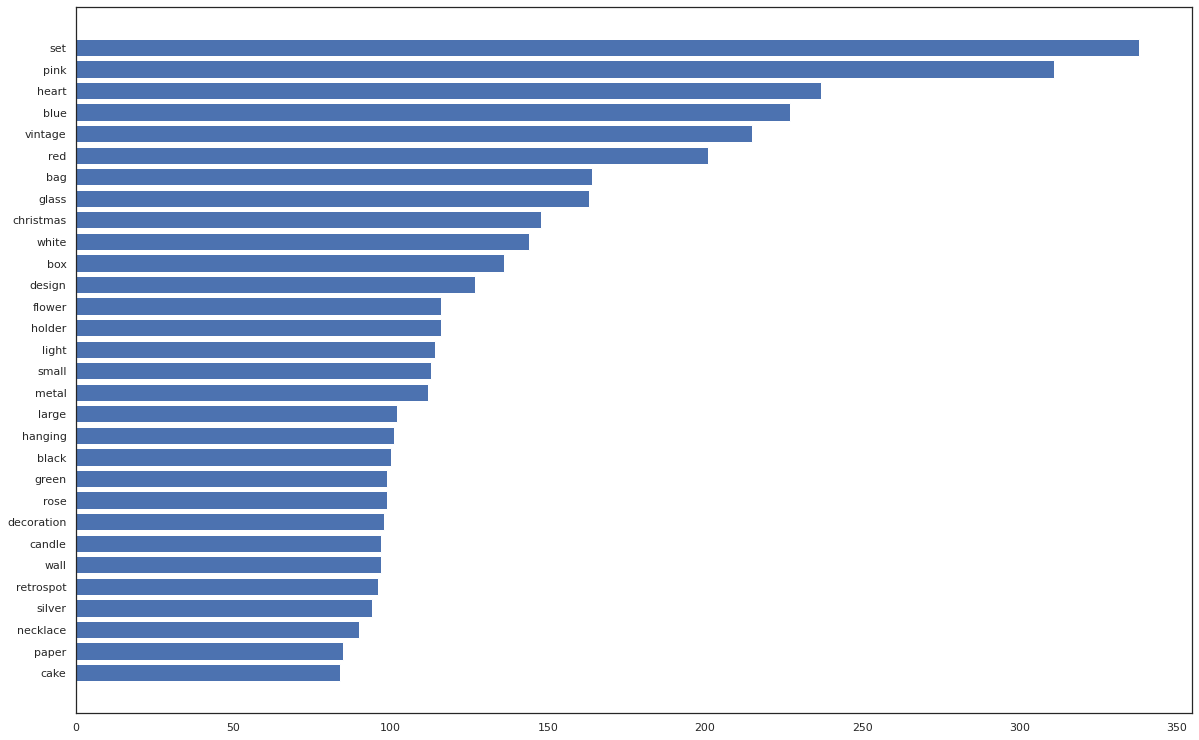

In [44]:
# Plotting 30 frequent words
plt.figure(figsize=(20,13))
ax = plt.barh(words_df['word'], width = words_df['count'])
plt.show()

#word cloud

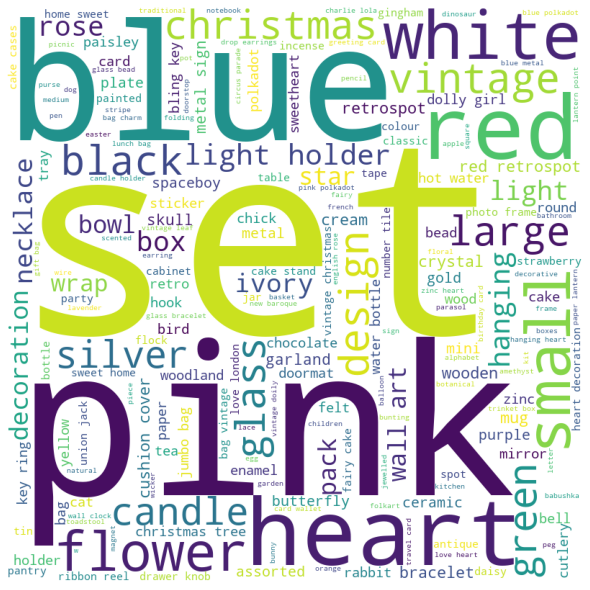

In [45]:
## Building a Word Cloud
## 
from wordcloud import WordCloud

all_words = ' '.join([text for text in data['Description_processed']])
 

wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='white', 
                      min_font_size = 10).generate(all_words)

#plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

#Bag of words

In [46]:
# Importing module
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer 

# Creating matrix of top 2500 tokens
tfidf = TfidfVectorizer(max_features=2500)


X = tfidf.fit_transform(data.Description_processed)

features = tfidf.get_feature_names()
print(len(features))

1937


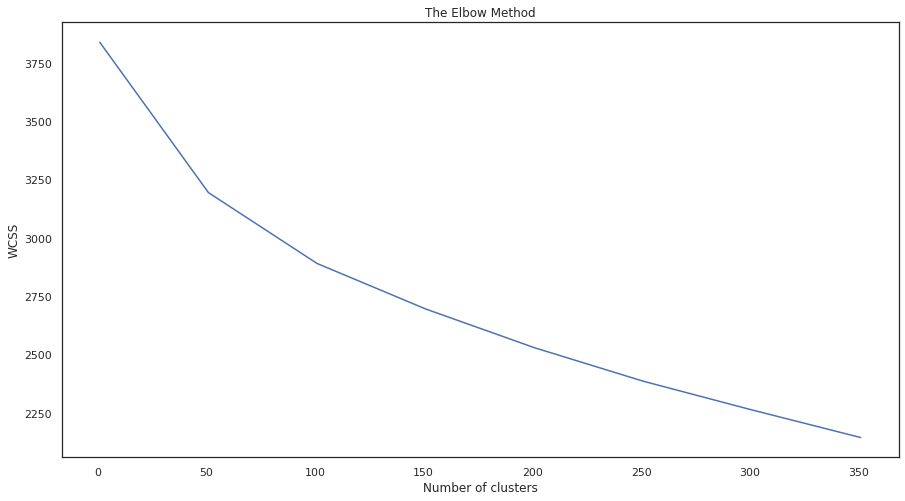

In [47]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,400,50):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(15,8), facecolor = None)
plt.plot(range(1,400,50),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('elbow.png')

In [48]:
kmeans = KMeans(n_clusters=54)
kmeans.fit(X)
cluster=kmeans.labels_

In [49]:
data["Description_processed"].shape

(3877,)

In [50]:
data["cluster_value"]=cluster
data[["Description",'Description_processed',"cluster_value"]].sample(10)

,Description,Description_processed,cluster_value
6302,SMALL SILVER TRELLIS CANDLEPOT,small silver trellis candlepot,37
250087,EMBROIDERED RIBBON REEL RACHEL,embroidered ribbon reel rachel,0
231104,BATHROOM HOOK,bathroom hook,7
5298,WHITE TISSUE REAM,white tissue ream,9
292973,LANDMARK FRAME NOTTING HILL,landmark frame notting hill,7
6955,WRAP SUKI AND FRIENDS,wrap suki friends,39
108987,GEORGIAN TRINKET BOX,georgian trinket box,49
190,HOMEMADE JAM SCENTED CANDLES,homemade jam scented candles,10
25260,VINTAGE RED TEATIME MUG,vintage red teatime mug,48
88391,MUMMY MOUSE RED GINGHAM RIBBON,mummy mouse red gingham ribbon,29


In [51]:
#Merge the Cluster_value to the mail table
df_merge = df.merge(data,left_on="Description",right_on="Description")
df_merge.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Description_processed,cluster_value
229303,561204,21507,"ELEPHANT, BIRTHDAY CARD,",12,2011-07-25,0.42,12836,United Kingdom,elephant birthday card,18
190976,561893,21136,PAINTED METAL PEARS ASSORTED,8,2011-07-31,1.69,12942,United Kingdom,painted metal pears assorted,22
342412,554812,23302,KNEELING MAT HOUSEWORK DESIGN,2,2011-05-26,1.65,15005,United Kingdom,kneeling mat housework design,7
234919,544790,21059,PARTY INVITES DINOSAURS,2,2011-02-23,0.85,16940,United Kingdom,party invites dinosaurs,7
177368,571243,79144B,PAINTED LIGHTBULB STAR+ MOON,6,2011-10-14,0.42,14595,United Kingdom,painted lightbulb star moon,7


In [52]:
#since stockcode aligns with description it may not make any difference by deleting it 
df_merge.drop(["Description","Description_processed","StockCode"],axis=1,inplace=True)

In [53]:
df_merge

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cluster_value
0,536365,6,2010-12-01,2.55,17850,United Kingdom,4
1,536373,6,2010-12-01,2.55,17850,United Kingdom,4
2,536375,6,2010-12-01,2.55,17850,United Kingdom,4
3,536390,64,2010-12-01,2.55,17511,United Kingdom,4
4,536394,32,2010-12-01,2.55,13408,United Kingdom,4
...,...,...,...,...,...,...,...
392727,581404,4,2011-12-08,2.95,13680,United Kingdom,4
392728,581412,4,2011-12-08,2.95,14415,United Kingdom,4
392729,581432,32,2011-12-08,2.55,13798,United Kingdom,4
392730,581538,1,2011-12-09,2.95,14446,United Kingdom,4


In [54]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392732 entries, 0 to 392731
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   InvoiceNo      392732 non-null  object        
 1   Quantity       392732 non-null  int64         
 2   InvoiceDate    392732 non-null  datetime64[ns]
 3   UnitPrice      392732 non-null  float64       
 4   CustomerID     392732 non-null  int64         
 5   Country        392732 non-null  object        
 6   cluster_value  392732 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(2), object(2)
memory usage: 22.5+ MB


In [55]:
#Find the total price and Remove Quantity and Unit price of the product
df_merge["Total_price"]=df_merge["Quantity"]*df_merge["UnitPrice"]
df_merge.sample(10)

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cluster_value,Total_price
248925,580727,2,2011-12-05,3.29,14096,United Kingdom,34,6.58
235857,576079,1,2011-11-13,9.95,16877,United Kingdom,7,9.95
174027,559899,4,2011-07-13,3.75,12528,Germany,21,15.00
358922,566213,4,2011-09-09,3.95,14895,United Kingdom,7,15.80
146514,552265,1,2011-05-08,2.95,14161,United Kingdom,2,2.95
314296,546315,2,2011-03-11,8.25,16558,United Kingdom,7,16.50
169362,544484,12,2011-02-21,2.10,15321,United Kingdom,17,25.20
120510,554513,24,2011-05-24,0.55,14057,United Kingdom,28,13.20
96271,569566,96,2011-10-05,1.65,14739,United Kingdom,4,158.40
329366,553220,12,2011-05-16,4.95,13319,United Kingdom,7,59.40


In [56]:
df_merge2 = df_merge
df_merge2

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cluster_value,Total_price
0,536365,6,2010-12-01,2.55,17850,United Kingdom,4,15.30
1,536373,6,2010-12-01,2.55,17850,United Kingdom,4,15.30
2,536375,6,2010-12-01,2.55,17850,United Kingdom,4,15.30
3,536390,64,2010-12-01,2.55,17511,United Kingdom,4,163.20
4,536394,32,2010-12-01,2.55,13408,United Kingdom,4,81.60
...,...,...,...,...,...,...,...,...
392727,581404,4,2011-12-08,2.95,13680,United Kingdom,4,11.80
392728,581412,4,2011-12-08,2.95,14415,United Kingdom,4,11.80
392729,581432,32,2011-12-08,2.55,13798,United Kingdom,4,81.60
392730,581538,1,2011-12-09,2.95,14446,United Kingdom,4,2.95


In [57]:
df_merge2.shape

(392732, 8)

In [ ]:
#visualization of count of top 5 clusters
#plt.figure(figsize=(18,5))
#plt.title('Top 5 Product clusters')
#sns.barplot(x='cluster_value',y='Count',data=df_merge2[:5])

In [58]:
#Checking the Country for CustomerID
for i in df_merge2.groupby(["CustomerID"])["Country"].unique():
  if len(i) > 1:
    print(i)

['Cyprus' 'Austria']
['Belgium' 'Denmark']
['Belgium' 'Spain']
['Switzerland' 'Australia']
['Denmark' 'Austria']
['Australia' 'Belgium']
['Cyprus' 'Spain']
['Switzerland' 'Cyprus']


In [59]:
country_df = df_merge2.groupby("CustomerID").agg({'Country':pd.Series.mode})
country_df.reset_index()
country_dummy=pd.get_dummies(country_df["Country"])
country_dummy=country_dummy.reset_index()
print(country_dummy.shape)
country_dummy.head()

(4339, 38)


,CustomerID,Australia,Austria,Bahrain,Belgium,Brazil,Canada,Channel Islands,Cyprus,Czech Republic,...,RSA,Saudi Arabia,Singapore,Spain,Sweden,Switzerland,USA,United Arab Emirates,United Kingdom,Unspecified
0,12346,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,12347,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,12348,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,12349,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12350,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
#column cluster_value 
cluster_df=df_merge2[['CustomerID','cluster_value']]
pd.get_dummies(cluster_df["cluster_value"])
cluster_dummy= pd.get_dummies(cluster_df, columns = ['cluster_value']).astype(int)
cluster_dummy=cluster_dummy.groupby("CustomerID").agg("sum")
cluster_dummy=cluster_dummy.reset_index()
print(cluster_dummy.shape)
cluster_dummy.head()

(4339, 55)


,CustomerID,cluster_value_0,cluster_value_1,cluster_value_2,cluster_value_3,cluster_value_4,cluster_value_5,cluster_value_6,cluster_value_7,cluster_value_8,...,cluster_value_44,cluster_value_45,cluster_value_46,cluster_value_47,cluster_value_48,cluster_value_49,cluster_value_50,cluster_value_51,cluster_value_52,cluster_value_53
0,12346,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,12347,9,3,0,0,6,4,0,29,0,...,0,0,1,0,0,0,1,7,18,0
2,12348,0,0,2,0,0,0,0,11,0,...,0,0,0,0,0,0,0,0,0,0
3,12349,1,2,1,0,2,1,0,15,1,...,0,1,0,0,4,3,6,0,0,0
4,12350,0,0,0,0,0,1,0,4,0,...,0,0,0,0,0,0,2,0,0,0


In [61]:
#column Total_price
Total_price_df=df_merge2[['CustomerID','Total_price']]
Total_price=Total_price_df.groupby('CustomerID').agg("mean")
Total_price=Total_price.reset_index()
print(Total_price.shape)

print(Total_price["Total_price"].describe())
Total_price['mean_price_binned'] = pd.cut(Total_price['Total_price'], [0, 13, 18,25,772000], labels=[0,1,2,3])
Total_price.drop("Total_price",axis=1,inplace=True)
Total_price.sample(5)

(4339, 2)
count     4339.000000
mean        68.334729
std       1467.744868
min          0.000000
25%         12.387560
50%         17.745568
75%         24.866214
max      77183.600000
Name: Total_price, dtype: float64


,CustomerID,mean_price_binned
3121,16607,2
2703,16029,3
198,12592,2
960,13638,1
4242,18158,1


In [62]:
from functools import reduce
frame=[country_dummy,cluster_dummy,Total_price]
final_df = reduce(lambda  left,right: pd.merge(left,right,on=['CustomerID'],
                                            how='outer'), frame)
final_df

,CustomerID,Australia,Austria,Bahrain,Belgium,Brazil,Canada,Channel Islands,Cyprus,Czech Republic,...,cluster_value_45,cluster_value_46,cluster_value_47,cluster_value_48,cluster_value_49,cluster_value_50,cluster_value_51,cluster_value_52,cluster_value_53,mean_price_binned
0,12346,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1,12347,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,7,18,0,2
2,12348,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
3,12349,0,0,0,0,0,0,0,0,0,...,1,0,0,4,3,6,0,0,0,2
4,12350,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4334,18280,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,2
4335,18281,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4336,18282,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4337,18283,0,0,0,0,0,0,0,0,0,...,17,1,0,13,5,21,0,0,0,0


In [63]:
final_df=final_df.dropna()
dff=final_df.copy()
dff.drop("CustomerID",axis=1,inplace=True)
X1=dff

In [64]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
X1 = scaler.fit_transform(X1)
X1

array([[-0.04559608, -0.04559608, -0.02147684, ..., -0.25510733,
        -0.1411669 ,  1.35301607],
       [-0.04559608, -0.04559608, -0.02147684, ...,  3.17934109,
        -0.1411669 ,  0.46880641],
       [-0.04559608, -0.04559608, -0.02147684, ..., -0.25510733,
        -0.1411669 ,  1.35301607],
       ...,
       [-0.04559608, -0.04559608, -0.02147684, ..., -0.25510733,
        -0.1411669 , -0.41540325],
       [-0.04559608, -0.04559608, -0.02147684, ..., -0.25510733,
        -0.1411669 , -1.29961291],
       [-0.04559608, -0.04559608, -0.02147684, ..., -0.25510733,
        -0.1411669 ,  1.35301607]])

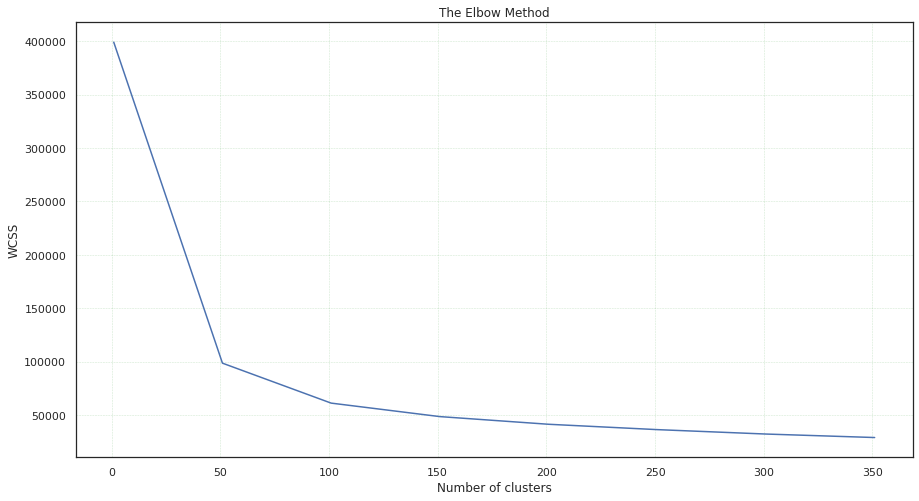

In [65]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,400,50):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize = (15, 8), facecolor = None) 
plt.plot(range(1,400,50),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('elbow.png')
plt.grid(which="minor",alpha=0.6,linewidth=0.3)
plt.grid(which="major",alpha=0.2,linewidth=0.3)
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.show()

In [66]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=50)
kmeans.fit(X1)
customer_IDcluster=kmeans.labels_

In [67]:
final_df["cluster_no"]=customer_IDcluster
final_df.head()

,CustomerID,Australia,Austria,Bahrain,Belgium,Brazil,Canada,Channel Islands,Cyprus,Czech Republic,...,cluster_value_46,cluster_value_47,cluster_value_48,cluster_value_49,cluster_value_50,cluster_value_51,cluster_value_52,cluster_value_53,mean_price_binned,cluster_no
0,12346,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,3
1,12347,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,7,18,0,2,0
2,12348,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,20
3,12349,0,0,0,0,0,0,0,0,0,...,0,0,4,3,6,0,0,0,2,31
4,12350,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,2,37


In [68]:
customer_cluster=final_df[["CustomerID","cluster_no"]]
customer_cluster

,CustomerID,cluster_no
0,12346,3
1,12347,0
2,12348,20
3,12349,31
4,12350,37
...,...,...
4334,18280,3
4335,18281,41
4336,18282,41
4337,18283,40
